## Understand The Problem Statement & Business Case

- For companies to become competitive and skyrocket their growth, they need to leverage AI/ML to develop predictive models to forecast sales in the future.
- Predictive models attempt at forecasting future sales based on historical data while taking into account seasonality effects, demand, holidays, promotions, and competition.
- In this project, you work as a data scientist in the sales department and the sales team provided you with data from 1115 stores.  
- The objective is to predict future daily sales based on the features. 

Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

## Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

### Import Sales Training Data

In [2]:
sales_train_df = pd.read_csv('/Users/antoniolevarity/Documents/Data Science For Business Case Study Projects/3. Sales Department Data/train.csv')
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


- About a million observation
- 1115 unique stores

### Data Dictionary:

- Id: transaction ID (combination of Store and date)
- Store: unique store Id
- Sales: sales/day, this is the target variable
- Customers: number of customers on a given day
- Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
- Promo: describes if store is running a promo on that day or not
- StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

In [3]:
sales_train_df.info()
sales_train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


- 9 columns in total
- 8 features, each contains 1017209 data points
- 1 target variable (sales)

- Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551
- Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

### Import Store Information Data

In [4]:
store_info_df = pd.read_csv('/Users/antoniolevarity/Documents/Data Science For Business Case Study Projects/3. Sales Department Data/store.csv')
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Data Dictionary:

- StoreType: categorical variable to indicate type of store (a, b, c, d)
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance (meters): distance to closest competitor store
- CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
- Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
- Promo2Since [Year/Week]: date when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [5]:
store_info_df.info()
store_info_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


- The previous dataframe includes the transactions recorded per day (in millions)
- This dataframe only includes information about the unique 1115 stores that are part of this study

- On average, the competition distance is 5404 meters away (5.4 kms)

## Explore Dataset

### Explore Sales Training Dataset

In [6]:
# Verify any missing data in the sales training data
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

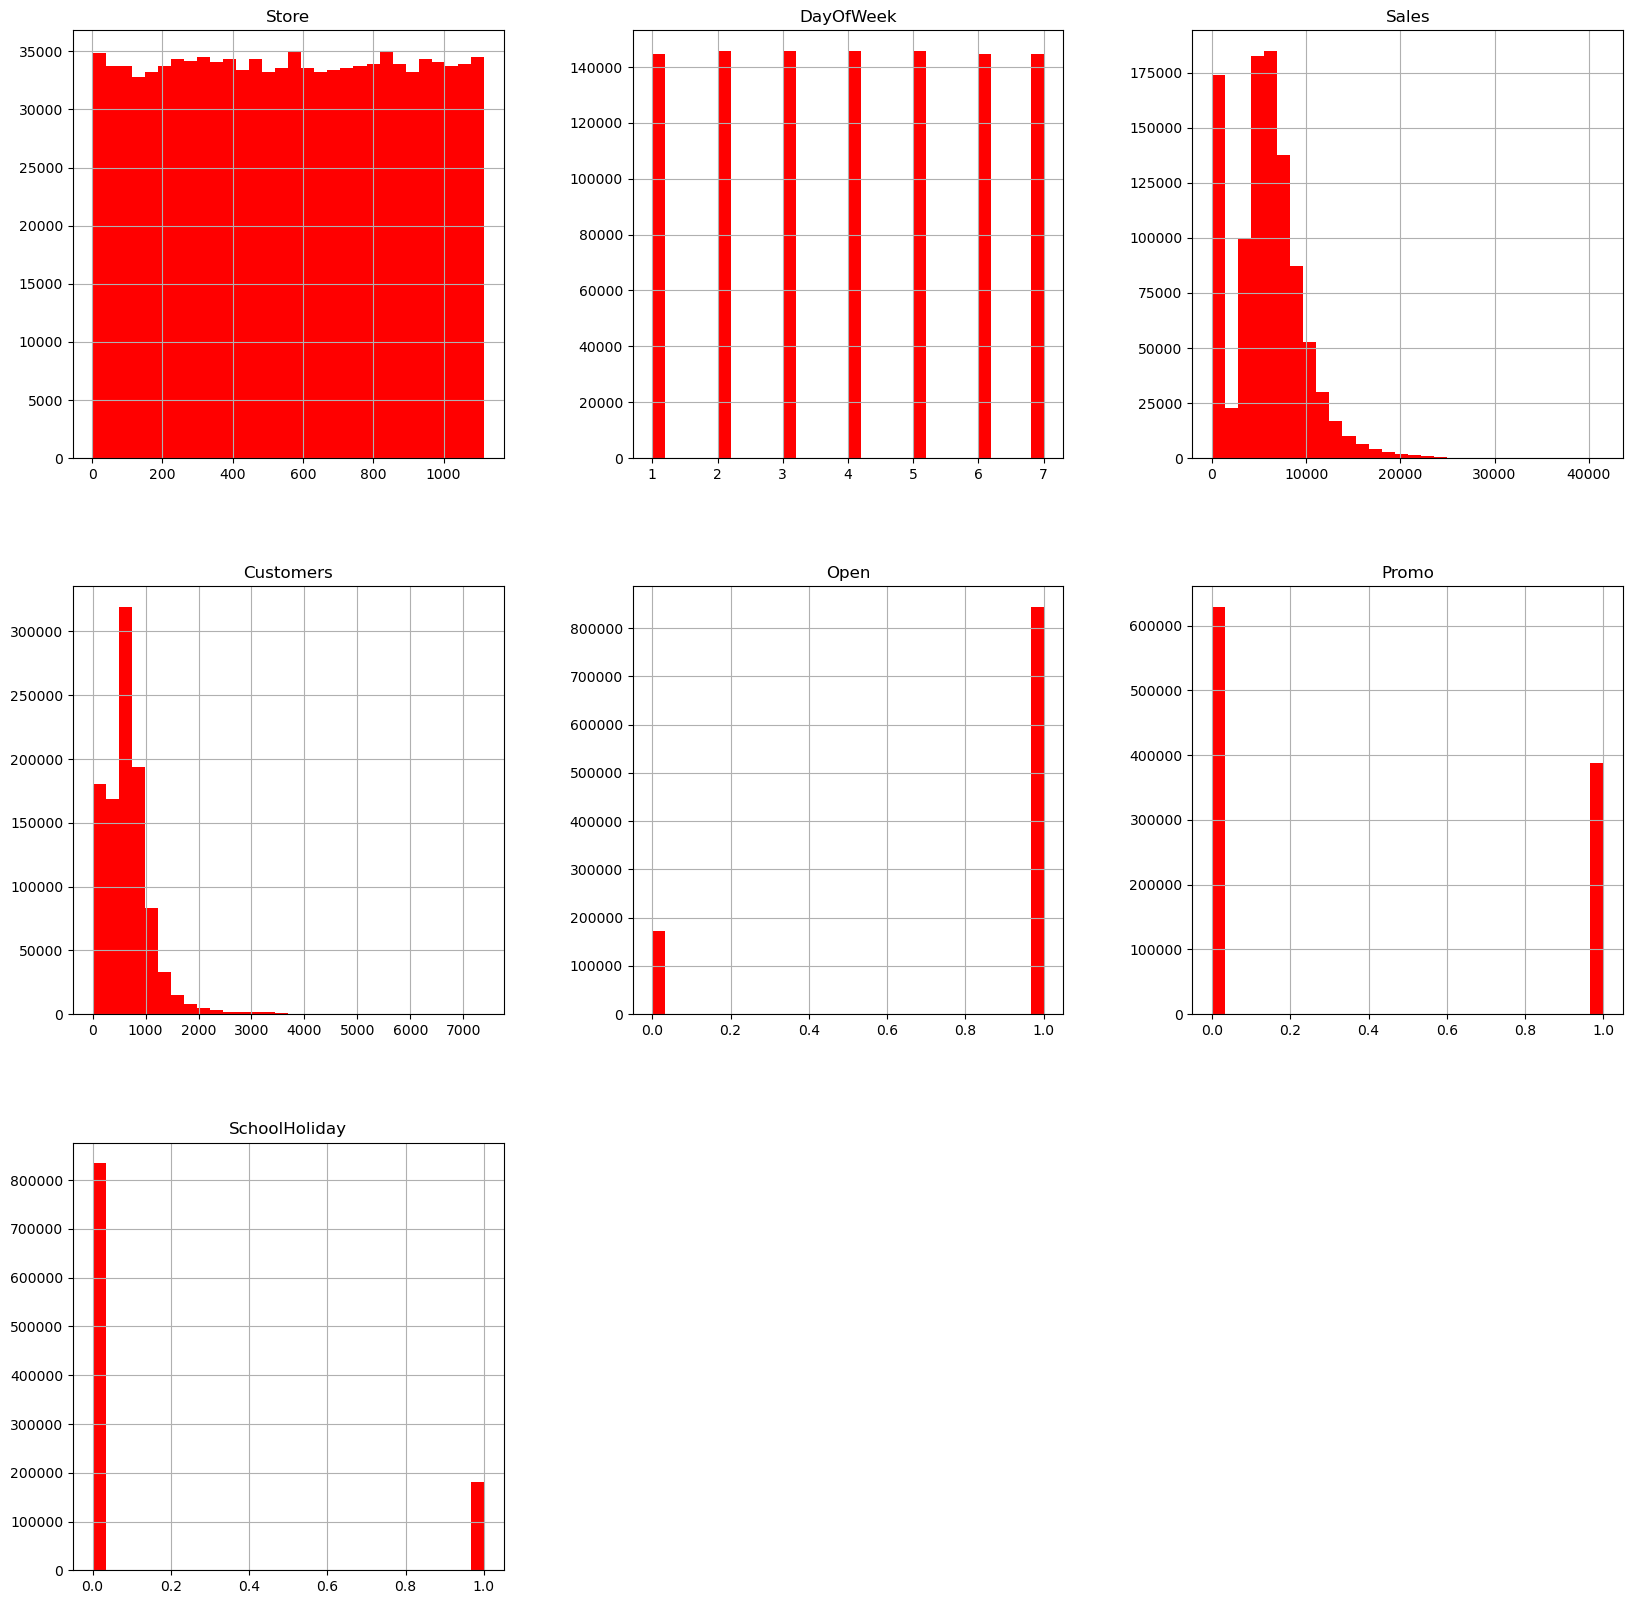

In [7]:
sales_train_df.hist(bins = 30, figsize = (20, 20), color = 'r');

- Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
- Data is equally distributed across various Days of the week (~150000 observations x 7 day = ~1.1 million observation)
- Stores are open ~80% of the time
- Data is equally distributed among all stores (no bias)
- Promo #1 was running ~40% of the time
- Average sales around 5000-6000 Euros
- School holidays are around ~18% of the time

In [8]:
# Count the number of stores that are open and closed
closed_stores = sales_train_df[sales_train_df['Open'] == 0]
open_stores = sales_train_df[sales_train_df['Open'] == 1]

print('Total = ', len(sales_train_df))
print('Number of closed stores = ', len(closed_stores))
print('Number of open stores = ', len(open_stores))

Total =  1017209
Number of closed stores =  172817
Number of open stores =  844392


In [9]:
# Removing closed stores
sales_train_df = sales_train_df[sales_train_df['Open']== 1]
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [10]:
# Dropping the open column since it has no meaning now
sales_train_df.drop(['Open'], axis = 1, inplace = True)
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [11]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


- Average sales = 6955 Euros,	average number of customers = 762	(increased)

### Explore Store Information Data

In [12]:
# Verify any missing data in the store information dataframe
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
# Taking a look at the missing values in the 'CompetitionDistance'
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [14]:
# Taking a look at the missing values in the 'CompetitionOpenSinceMonth'
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


- There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing

In [15]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


- It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero

In [16]:
# Filling these values to zeros

str_cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

for col in str_cols:
    store_info_df[col].fillna(0, inplace = True)

In [17]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [18]:
# There are 3 rows with 'CompetitionDistance' values missing, will fill them up with with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

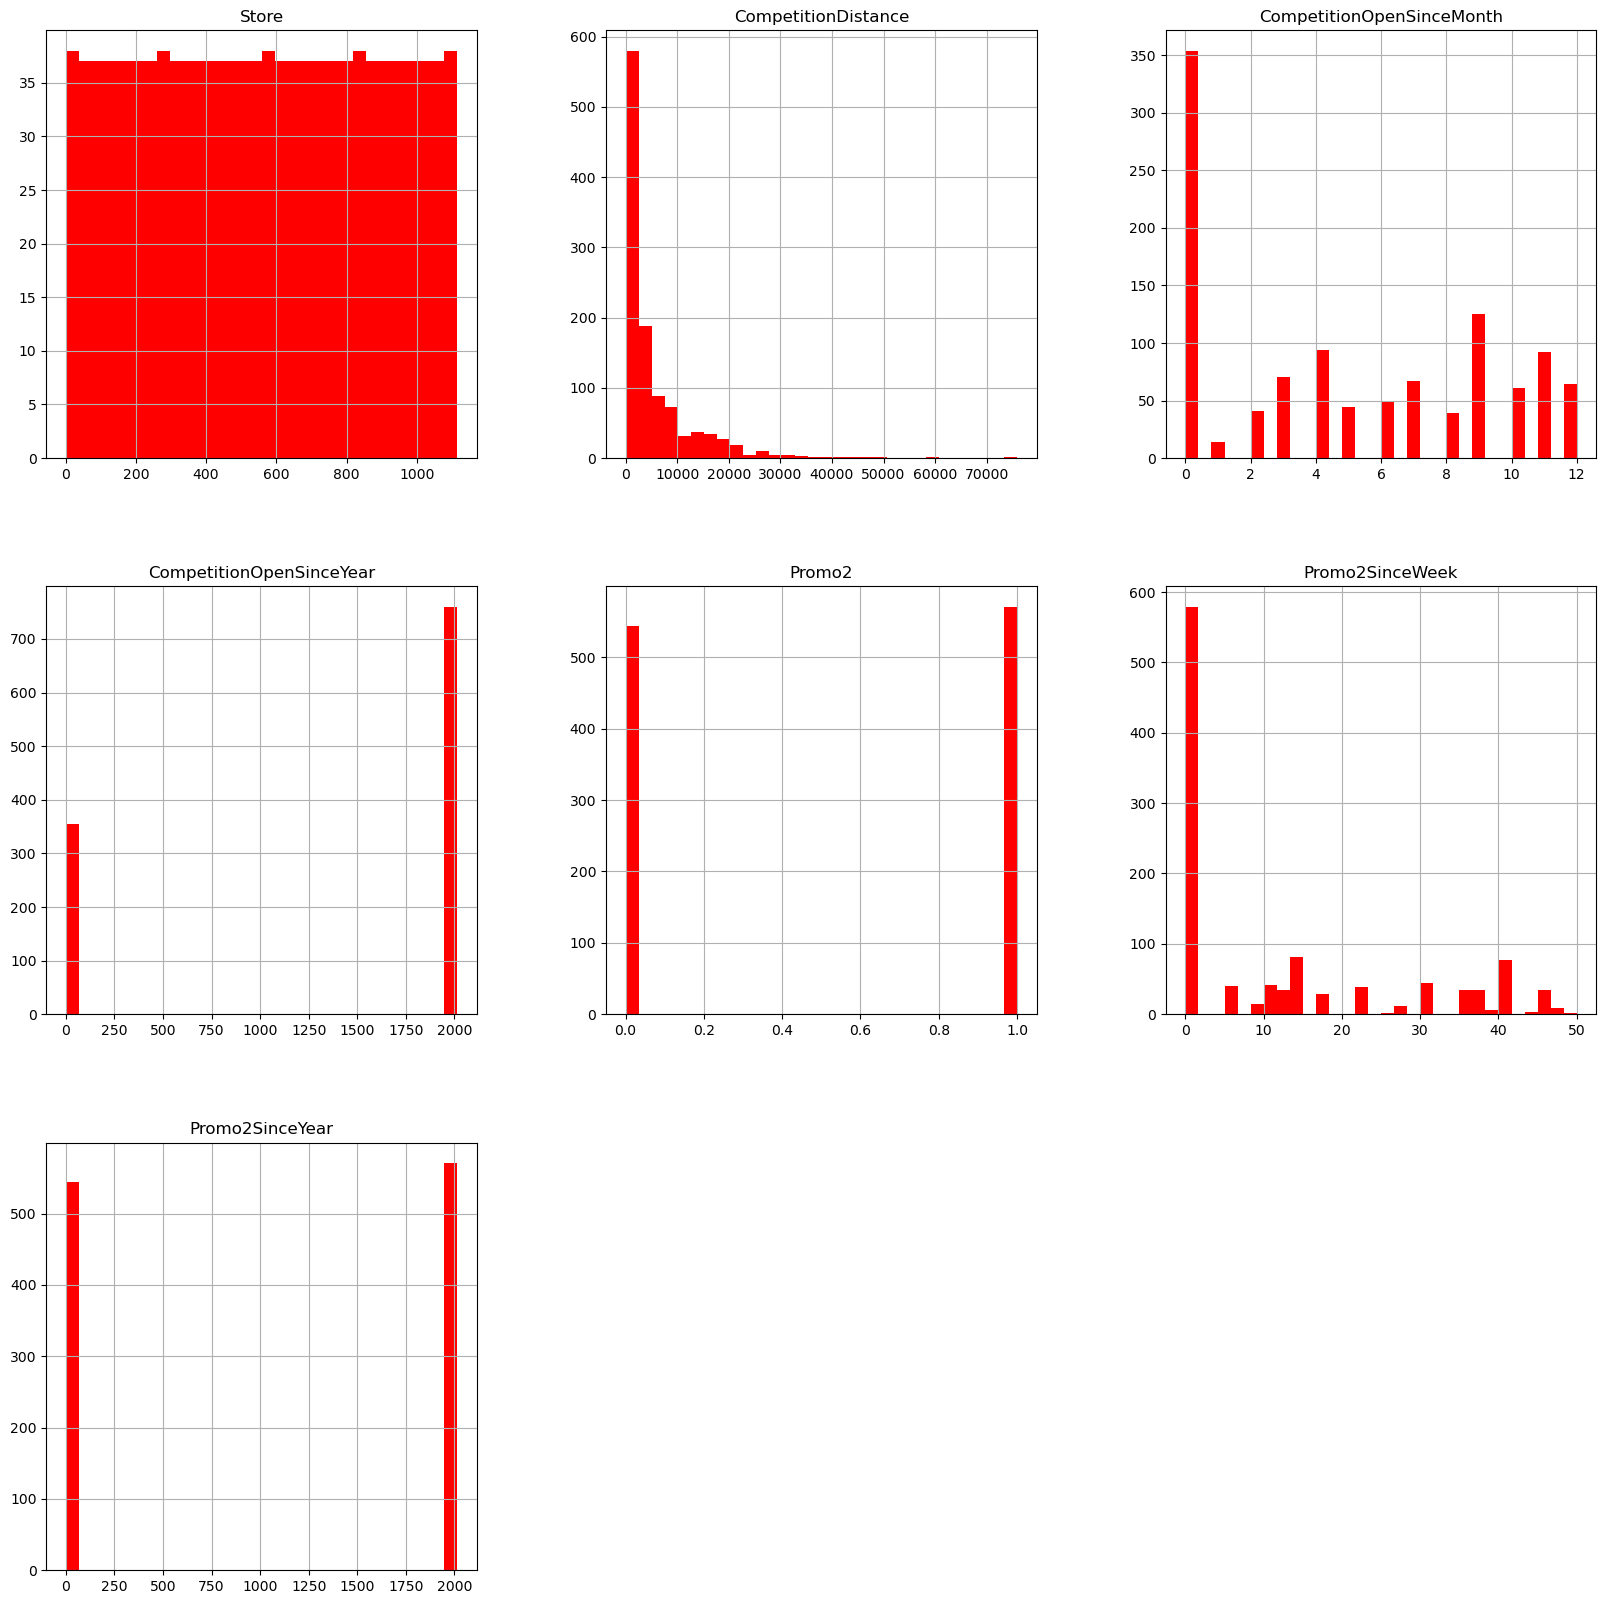

In [19]:
store_info_df.hist(bins = 30, figsize = (20, 20), color = 'r');

- Half of stores are involved in promo 2
- Half of the stores have their competition at a distance of 0-3000m (3 kms away)

TASK #3.3: EXPLORE MERGED DATASET

In [20]:
# Merging both data frames together based on 'store'
sales_train_df_all = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')
sales_train_df_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


In [21]:
# Exclude the 'Date', 'StateHoliday', 'PromoInterval', 'StoreType', and 'Assortment' columns from the correlation calculation
correlations = sales_train_df_all.drop(columns=['Date', 'StateHoliday', 'PromoInterval', 'StoreType', 'Assortment']).corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

- Customers and promo are positively correlated with the sales
- Promo2 does not seem to be effective at all

<Axes: >

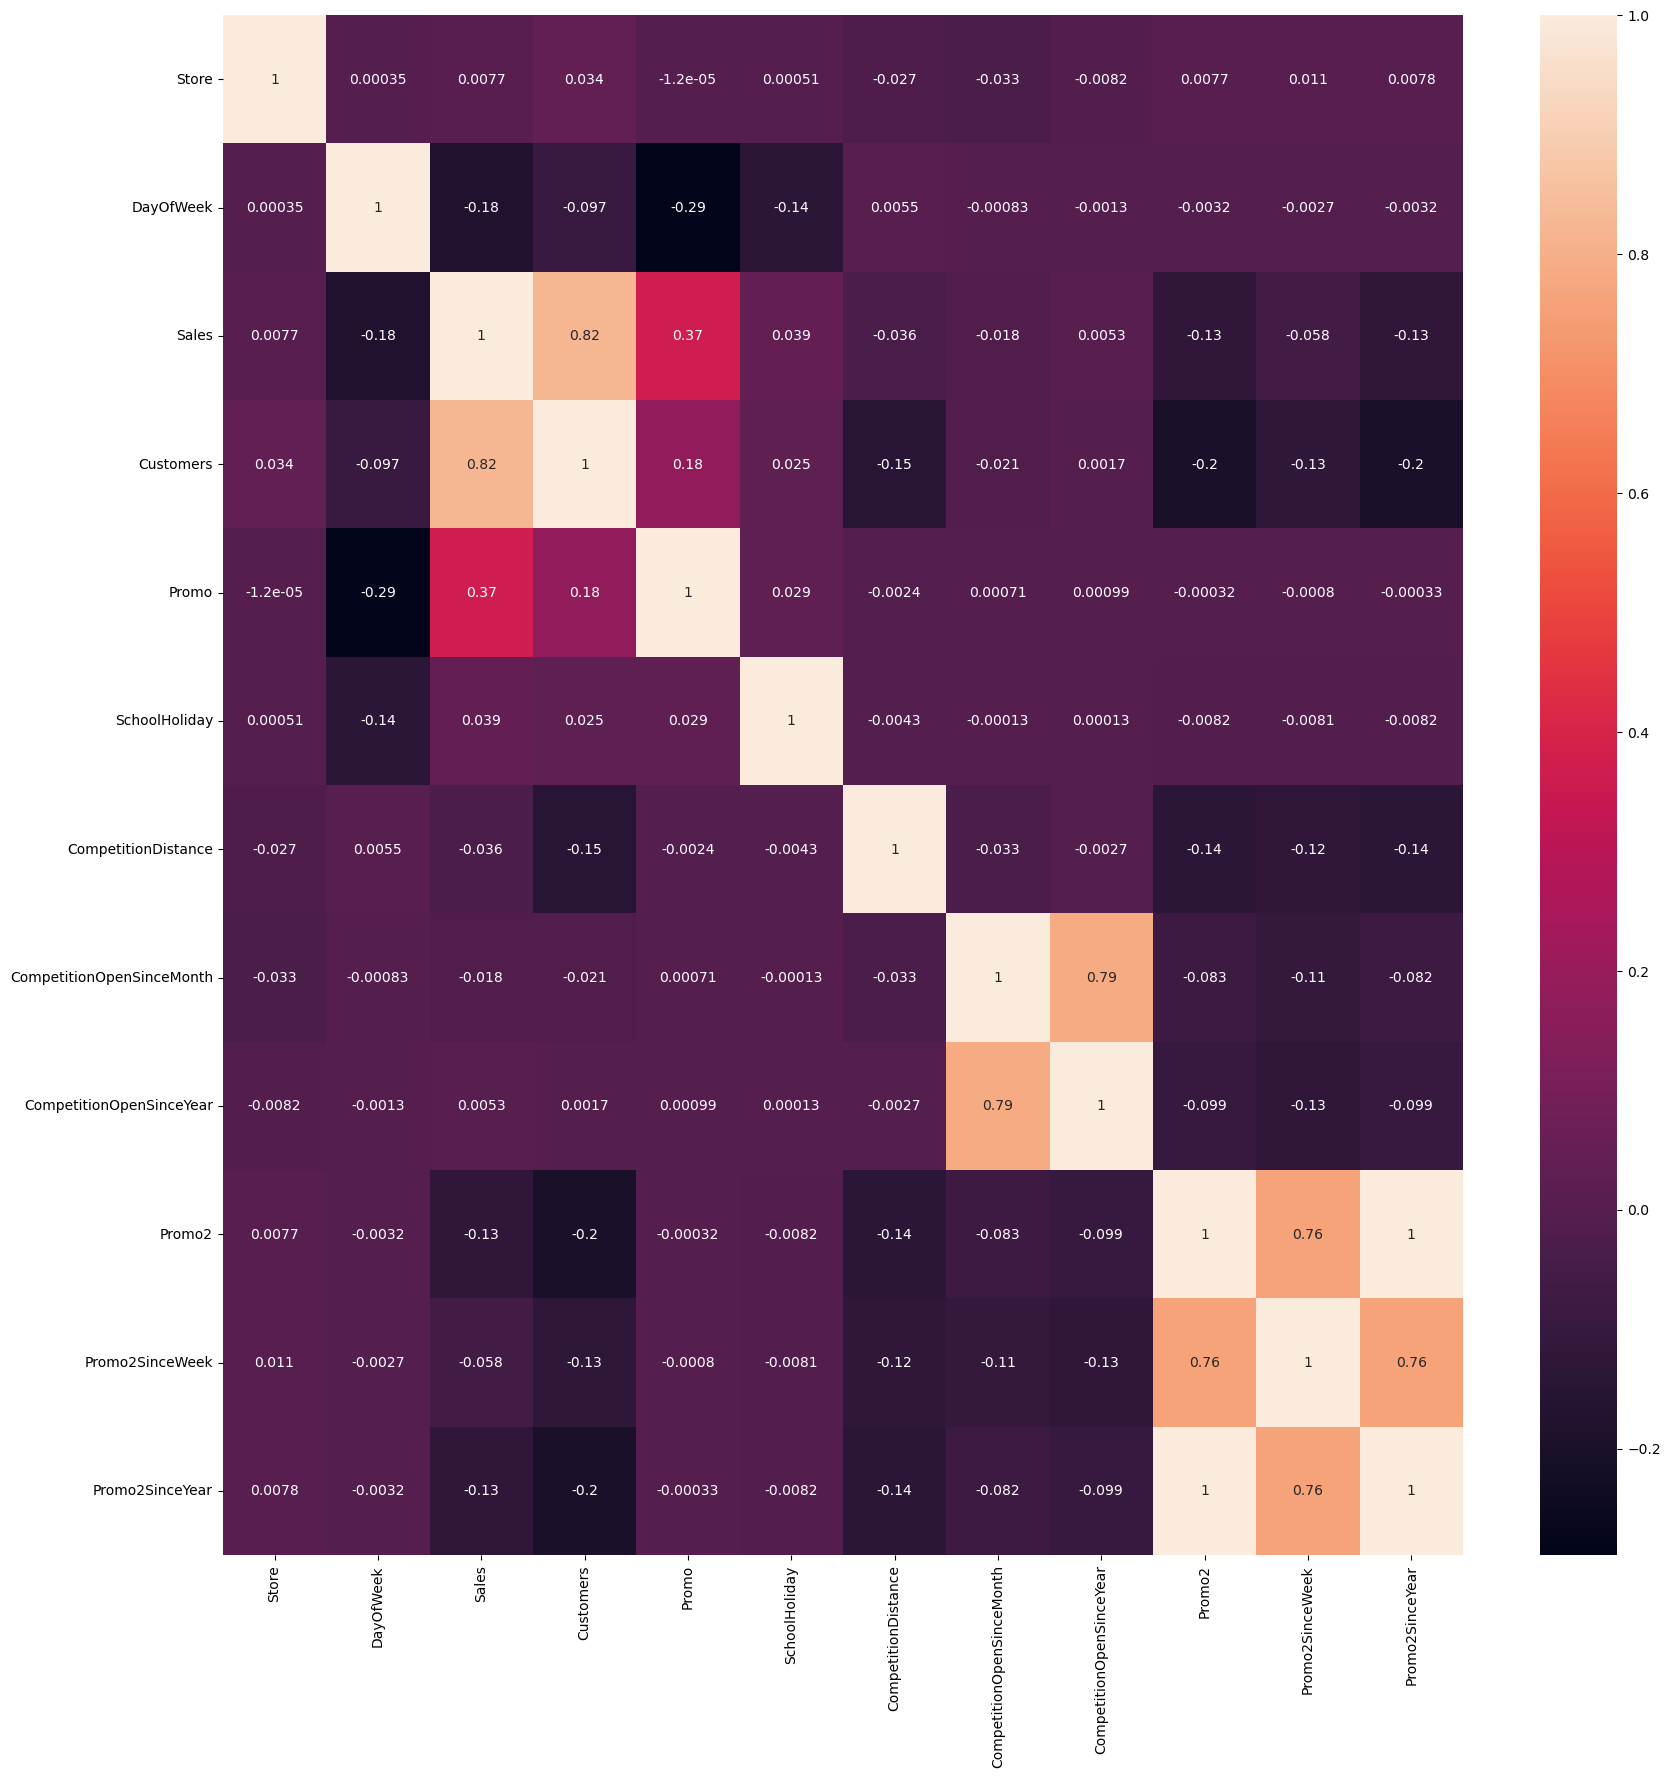

In [22]:
correlations = sales_train_df_all.drop(columns=['Date', 'StateHoliday', 'PromoInterval', 'StoreType', 'Assortment']).corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

- Customers/Promo and sales are strongly correlated

In [23]:
# Separating parts of the date into columns
sales_train_df_all['Year'] = pd.DatetimeIndex(sales_train_df_all['Date']).year
sales_train_df_all['Month'] = pd.DatetimeIndex(sales_train_df_all['Date']).month
sales_train_df_all['Day'] = pd.DatetimeIndex(sales_train_df_all['Date']).day
sales_train_df_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


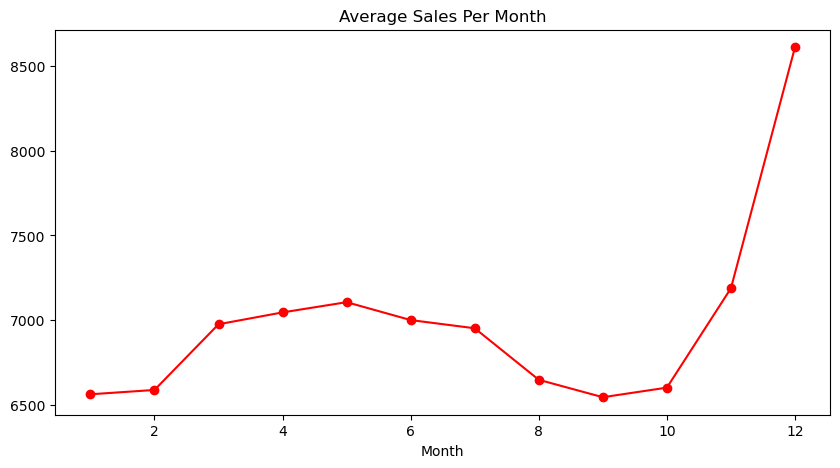

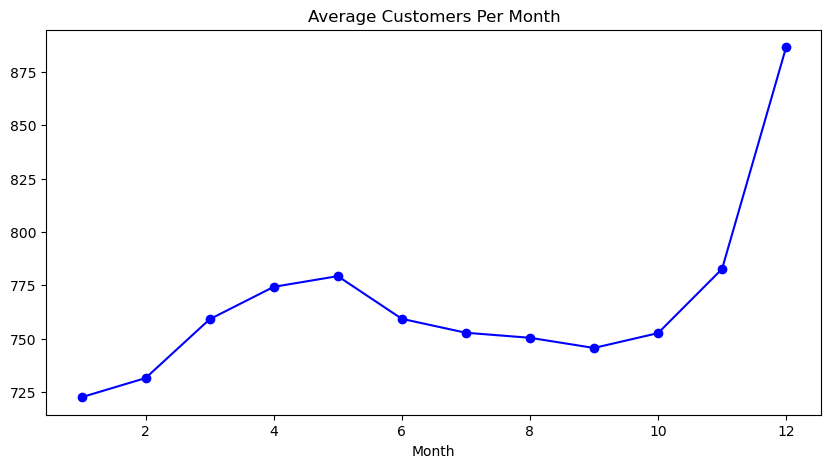

In [24]:
# Taking a look at the average sales and number of customers per month
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column

sales_train_df_all.groupby('Month')['Sales'].mean().plot(figsize = (10, 5), color = 'r', marker = 'o')
plt.title('Average Sales Per Month');

plt.figure()
sales_train_df_all.groupby('Month')['Customers'].mean().plot(figsize = (10, 5), color = 'b', marker = 'o')
plt.title('Average Customers Per Month');

- It looks like sales and number of customers peak around christmas timeframe

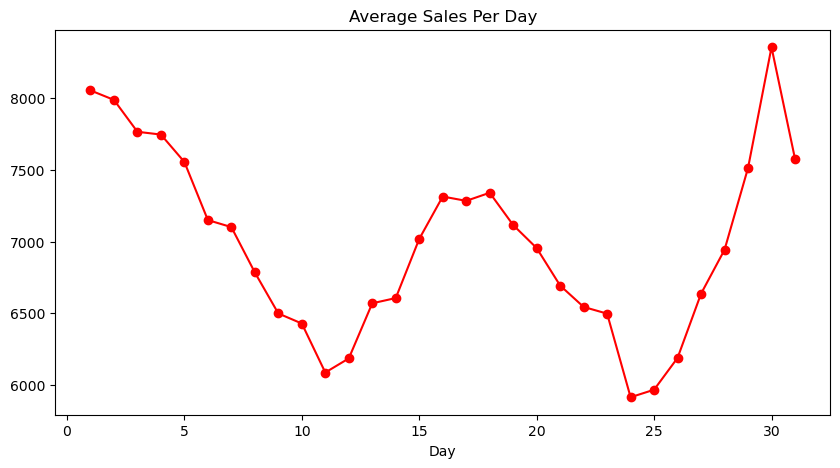

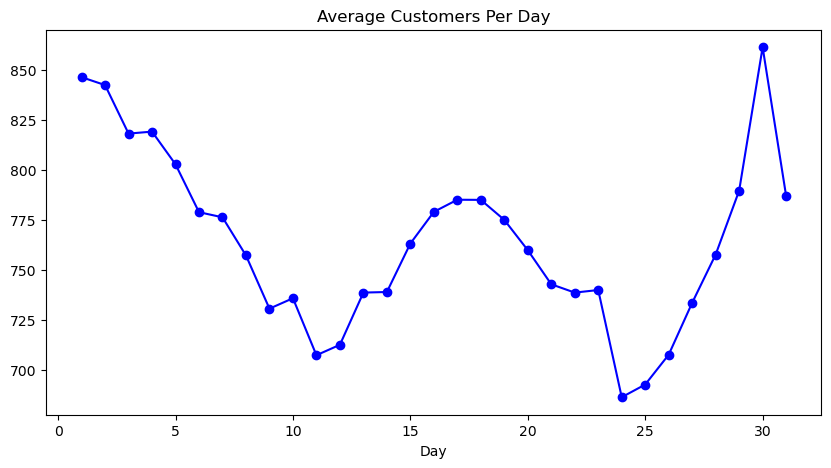

In [25]:
# Taking a look at the sales and customers per day of the month

sales_train_df_all.groupby('Day')['Sales'].mean().plot(figsize = (10, 5), color = 'r', marker = 'o')
plt.title('Average Sales Per Day');

plt.figure()
sales_train_df_all.groupby('Day')['Customers'].mean().plot(figsize = (10, 5), color = 'b', marker = 'o')
plt.title('Average Customers Per Day');

- Minimum number of customers are generally around the 24th of the month
- Most customers and sales are around 30th and 1st of the month

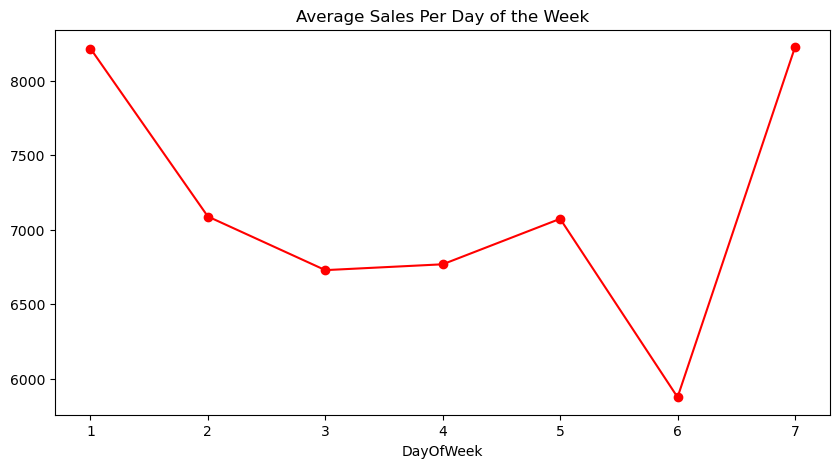

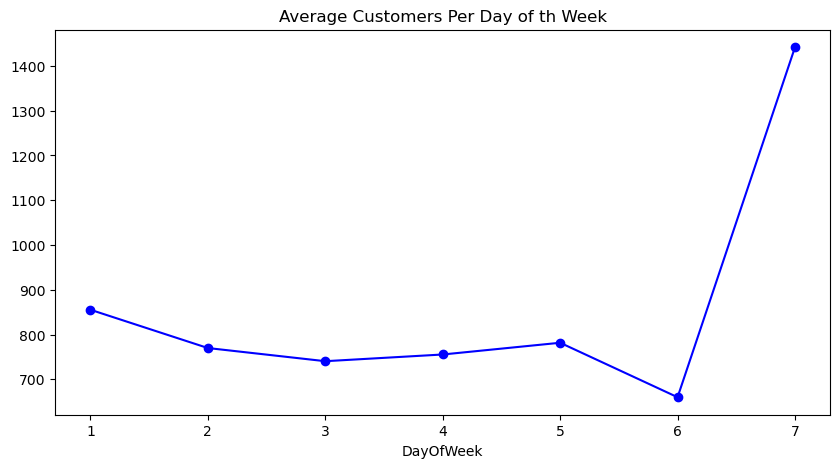

In [26]:
# Evaluating for the day of the week  (note that 7 = Sunday)

sales_train_df_all.groupby('DayOfWeek')['Sales'].mean().plot(figsize = (10, 5), color = 'r', marker = 'o')
plt.title('Average Sales Per Day of the Week');

plt.figure()
sales_train_df_all.groupby('DayOfWeek')['Customers'].mean().plot(figsize = (10, 5), color = 'b', marker = 'o')
plt.title('Average Customers Per Day of th Week');

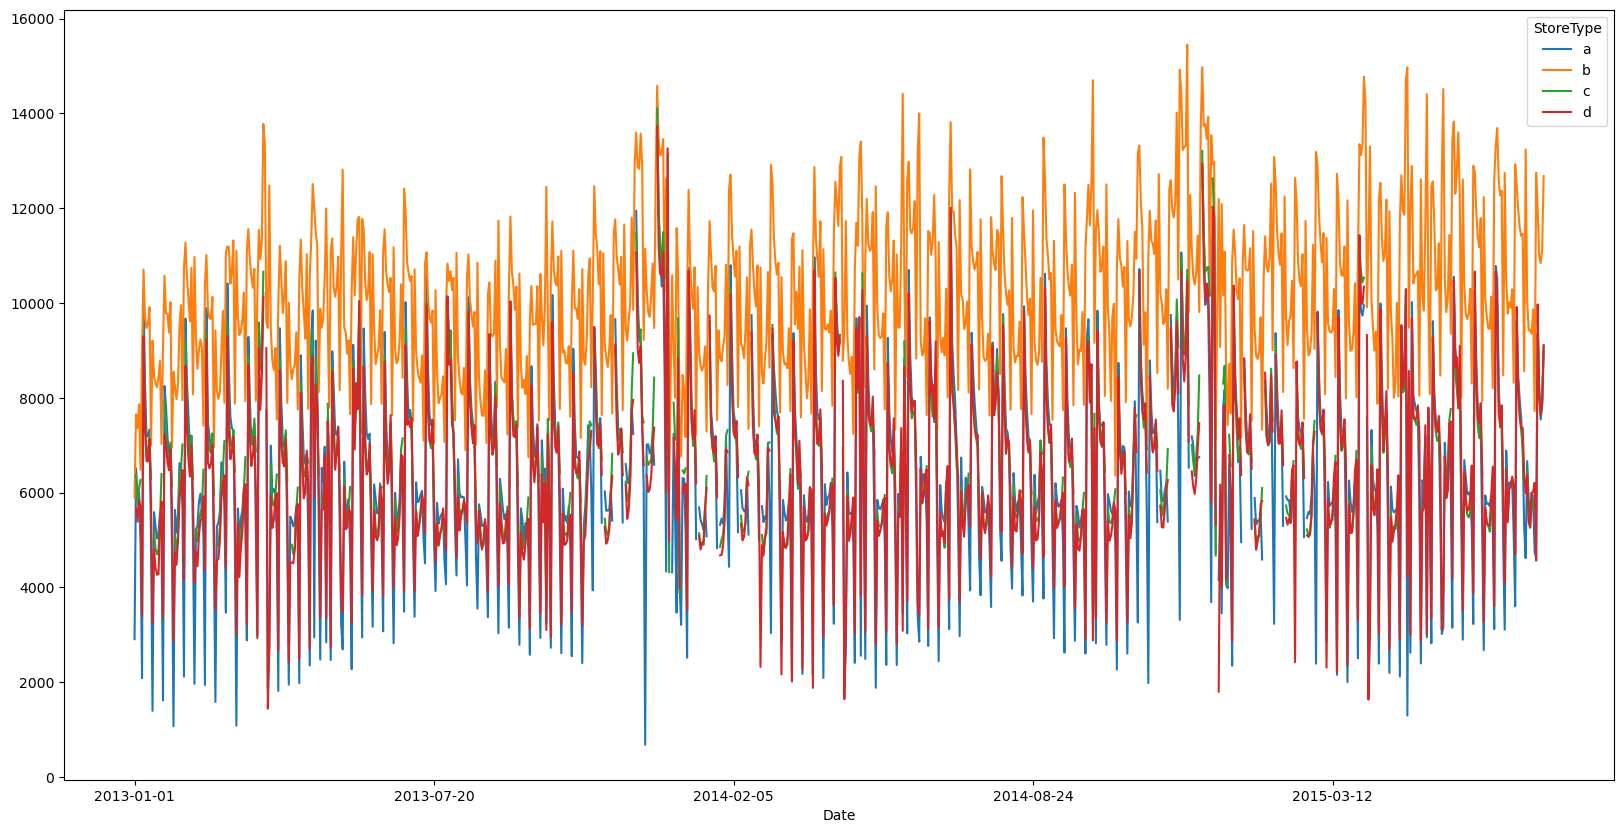

In [27]:
fig, ax = plt.subplots(figsize = (20, 10))
sales_train_df_all.groupby(['Date', 'StoreType'])['Sales'].mean().unstack().plot(ax = ax);

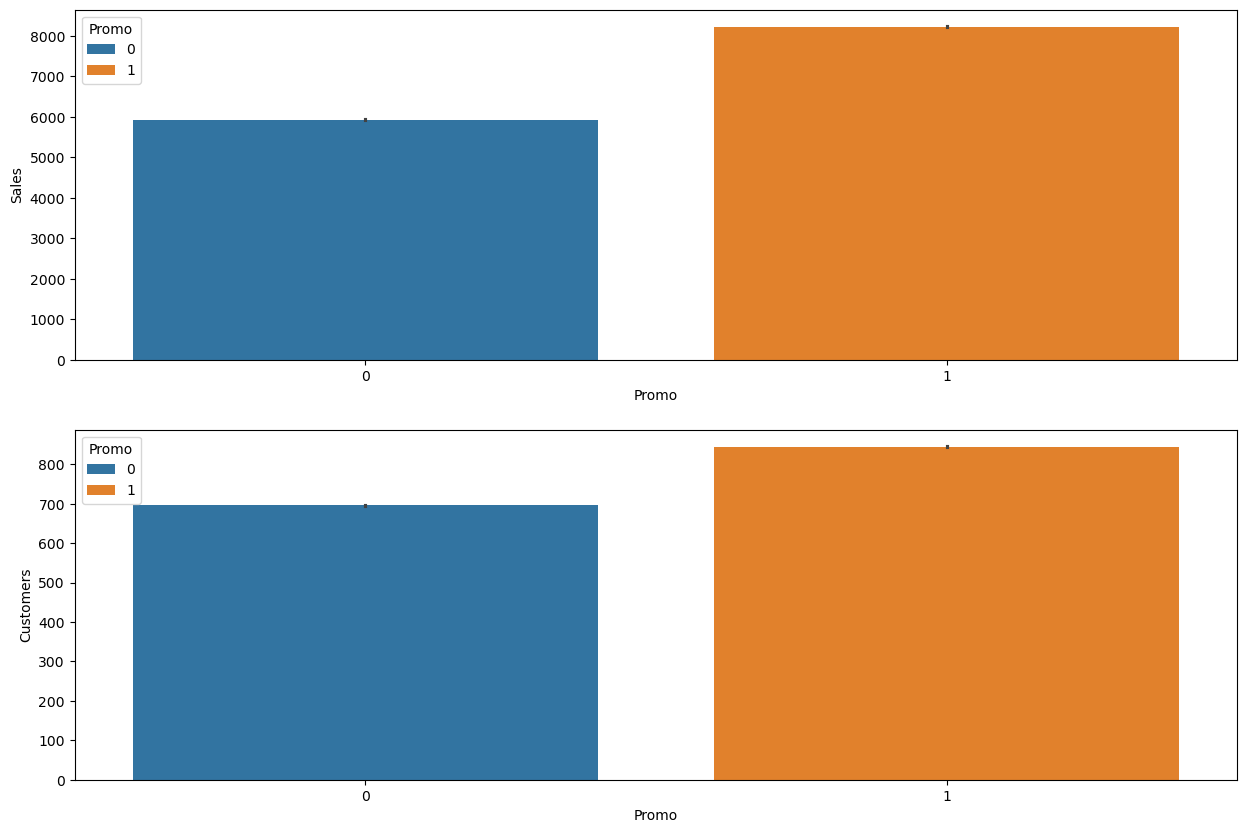

In [28]:
plt.figure(figsize = (15, 10))

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_df_all, hue = 'Promo')

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_df_all, hue = 'Promo');

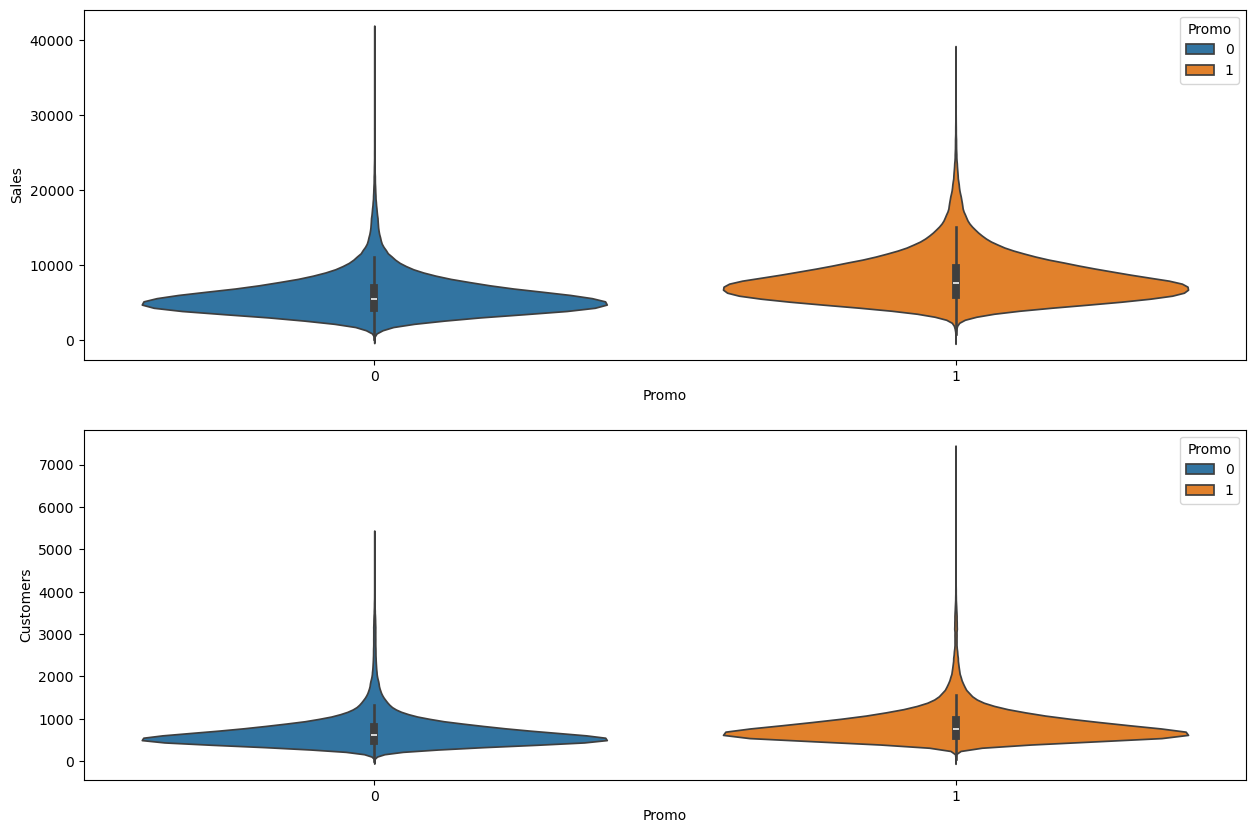

In [29]:
plt.figure(figsize = (15, 10))

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_df_all, hue = 'Promo')

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_df_all, hue = 'Promo');

## Understand The Intuition Behind Facebook Prophet

- Prophet is open source software released by Facebook’s Core Data Science team.
- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- Prophet implements an additive regression model with four elements:
    - A piecewise linear, Prophet automatically picks up change points in the data and identifies any change in trends.  
    - A yearly seasonal component modeled using Fourier series.
    - A weekly seasonal component.
    - A holiday list that can be manually provided.
- Additive Regression model takes the form: 
𝑌=𝛽_0+∑2_(𝑗=1)^𝑝▒〖𝑓_𝑗 (𝑋_𝑗 )+𝜖〗
- The functions 𝒇_𝒋 (𝒙_𝒋) are unknown smoothing functions fit from the data 

- Accurate & Fast
    - Facebook teams uses Prophet for accurate forecasting and planning. 
    - Prophet can generate results in seconds.
- Automatic
    - No need to perform data preprocessing.
    - Prophet works with missing data with several outliers.
- Domain Knowledge Integration
    - Users can tweak forecast by manually adding domain specific knowledge. 

## Train The Model

In [30]:
# import prophet
from prophet import Prophet

In [31]:
def sales_predictions(Store_ID, sales_df, periods):
    # Filter the data for the store
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')
    
    # Create a prophet model
    model = Prophet()
    model.fit(sales_df)
    
    # Create a future dataframe
    future = model.make_future_dataframe(periods = periods)
    
    # Make predictions
    forecast = model.predict(future)
    
    # Plot the predictions
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)

14:17:30 - cmdstanpy - INFO - Chain [1] start processing
14:17:30 - cmdstanpy - INFO - Chain [1] done processing


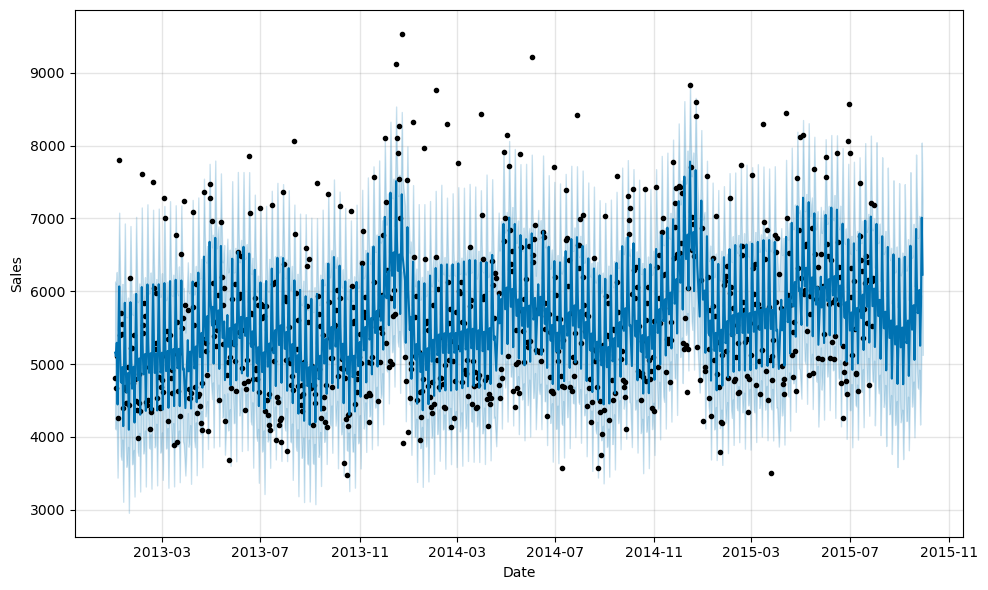

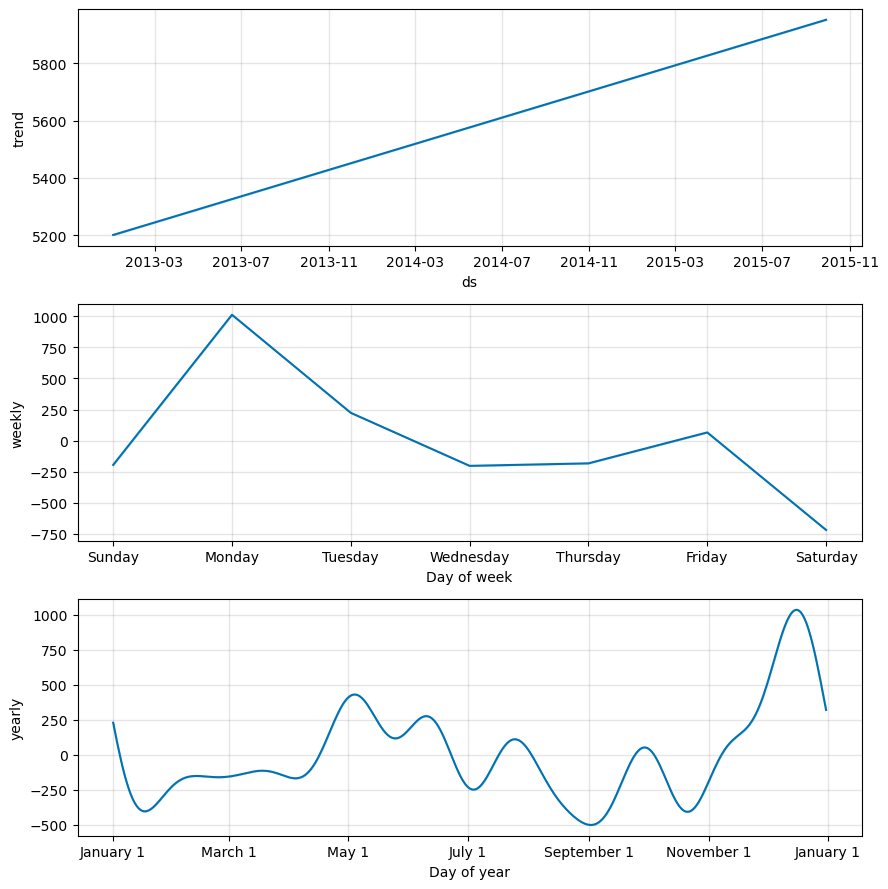

In [32]:
sales_predictions(10, sales_train_df_all, 60)

## Train The Model Cont'd

- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

In [33]:
def sales_predictions(Store_ID, sales_df, holidays, periods):
    # Filter the data for the store
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')
    
    # Create a prophet model
    model = Prophet(holidays = holidays)
    model.fit(sales_df)
    
    # Create a future dataframe
    future = model.make_future_dataframe(periods = periods)
    
    # Make predictions
    forecast = model.predict(future)
    
    # Plot the predictions
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)

In [34]:
# Get all the dates pertaining to school holidays
school_holidays = sales_train_df_all[sales_train_df_all['SchoolHoliday']==1].loc[:, 'Date'].values
school_holidays

array(['2015-07-31', '2015-07-31', '2015-07-31', ..., '2013-01-01',
       '2013-01-01', '2013-01-01'], dtype=object)

In [35]:
# Get all the dates pertaining to state holidays
state_holidays = sales_train_df_all[(sales_train_df_all['StateHoliday']== 'a') | (sales_train_df_all['StateHoliday']== 'b') | (sales_train_df_all['StateHoliday']== 'c')].loc[:, 'Date'].values
state_holidays

array(['2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-06-04',
       '2015-06-04', '2015-06-04', '2015-06-04', '2015-

In [36]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 'holiday': 'State Holiday'})
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'School Holiday'})

In [37]:
state_holidays

,ds,holiday
0,2015-06-04,State Holiday
1,2015-06-04,State Holiday
2,2015-06-04,State Holiday
3,2015-06-04,State Holiday
4,2015-06-04,State Holiday
...,...,...
905,2013-01-01,State Holiday
906,2013-01-01,State Holiday
907,2013-01-01,State Holiday
908,2013-01-01,State Holiday


In [38]:
school_holidays

,ds,holiday
0,2015-07-31,School Holiday
1,2015-07-31,School Holiday
2,2015-07-31,School Holiday
3,2015-07-31,School Holiday
4,2015-07-31,School Holiday
...,...,...
163452,2013-01-01,School Holiday
163453,2013-01-01,School Holiday
163454,2013-01-01,School Holiday
163455,2013-01-01,School Holiday


In [39]:
# Concatenate both school and state holidays
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2015-06-04,State Holiday
1,2015-06-04,State Holiday
2,2015-06-04,State Holiday
3,2015-06-04,State Holiday
4,2015-06-04,State Holiday
...,...,...
163452,2013-01-01,School Holiday
163453,2013-01-01,School Holiday
163454,2013-01-01,School Holiday
163455,2013-01-01,School Holiday


14:17:34 - cmdstanpy - INFO - Chain [1] start processing
14:17:34 - cmdstanpy - INFO - Chain [1] done processing


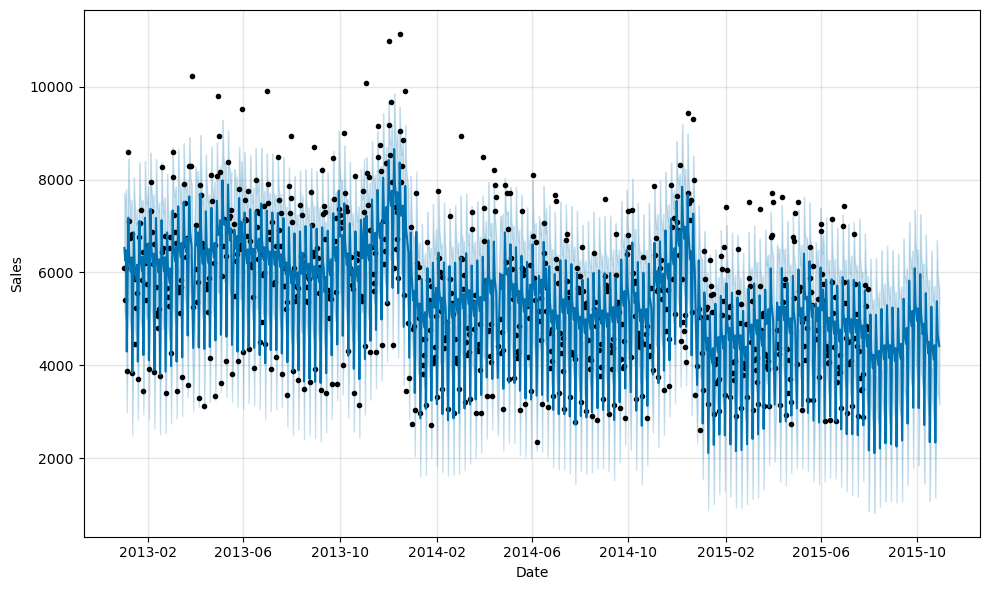

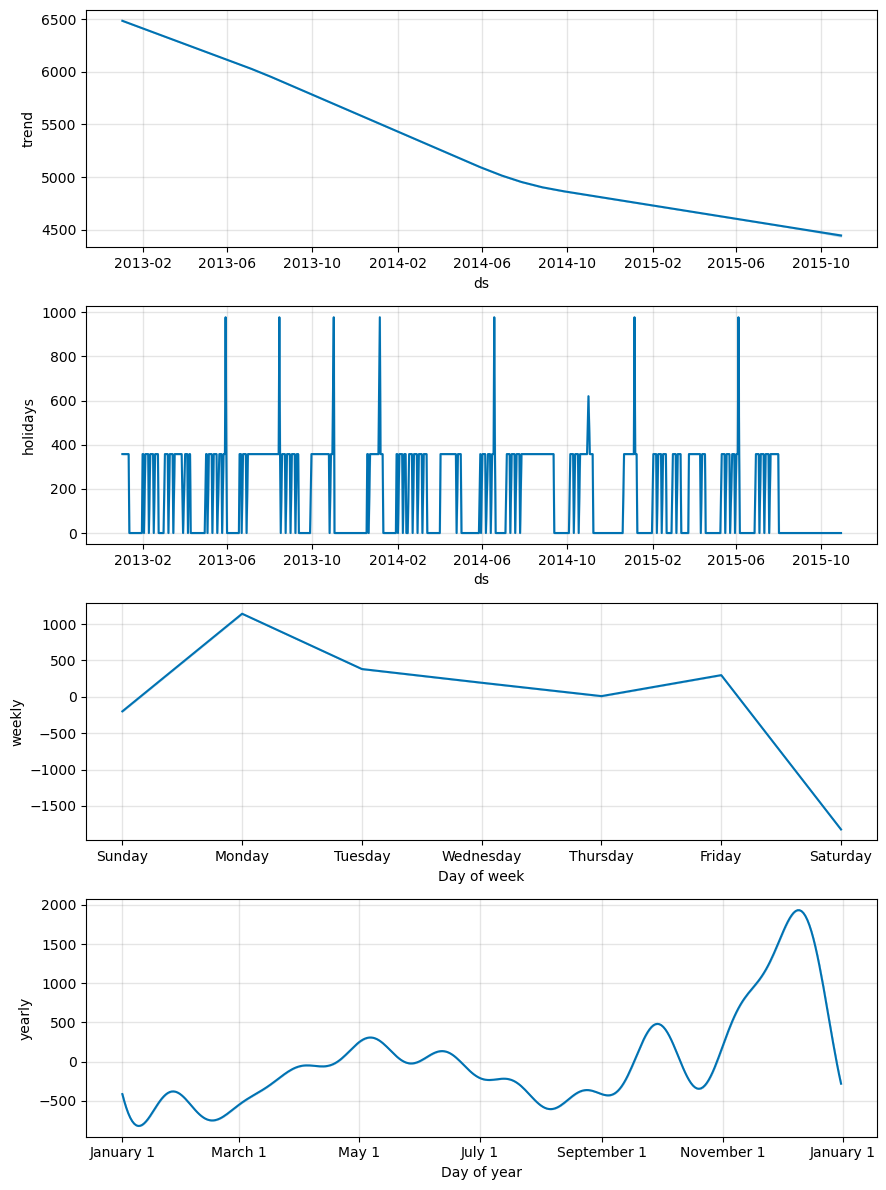

In [40]:
# Make predictions using holidays for a specific store
sales_predictions(6, sales_train_df_all, school_state_holidays, 90)

## Recommendations:

1. **Promotional Strategies**: Implement promotional strategies during peak sales periods identified in the analysis to maximize revenue.

2. **Monitor Key Metrics**: Regularly monitor key performance metrics such as sales growth, customer acquisition, and retention rates to ensure the department is on track to meet its goals.

3. **Leverage Data Analytics**: Continuously leverage data analytics to gain deeper insights into customer behavior and market trends, allowing for more informed decision-making.
